# Lead Scoring in X Education

The company wishes to identify the most potential leads, also known as ‘Hot Leads’. 

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Results Expected
A well-commented Jupyter notebook with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation.
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.
 

## You need to submit the following four components:

- Python commented file: Should include detailed comments and should not contain unnecessary pieces of code.
- Word File: Answer all the questions asked by the company in the word document provided.
- Presentation:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.
- PDF File: Write the summary report in a word file and submit it as a PDF.

# Model Predict a Customer is a HotLead or not

In [208]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# For spliting train & test
from sklearn.model_selection import train_test_split

# For scaling Features
from sklearn.preprocessing import StandardScaler

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For model building
import statsmodels.api as sm

# Feature Selection using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

## Load & Understand Data

In [124]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [125]:
leads.shape

(9240, 37)

In [126]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [127]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Clean & Prepare Data

In [128]:
# Check if id fields have duplicated value
# Function return True if no duplicated data in a column
sum(leads.duplicated(subset='Prospect ID'))

0

In [129]:
sum(leads.duplicated(subset='Lead Number'))

0

=> No duplicated base on checking the id fields

## List of dropped columns

In [130]:
dropped_columns = ['Prospect ID', 'Lead Number']

## Handle NULL & non-sense values

In [131]:
# NULL Values Pecentage
round(leads.isnull().sum()/len(leads.index)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Add columns which have more than 45% of null values into dropped_columns

In [132]:
null_columns = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
dropped_columns = dropped_columns + null_columns
dropped_columns

['Prospect ID',
 'Lead Number',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [133]:
# drop columns
leads.drop(dropped_columns, 1, inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


### Treatment for Select Value as NaN

In [134]:
leads = leads.replace('Select', np.nan)

In [135]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

### Value Counts Categorical Columns

In [136]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [137]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [138]:
leads['Do Not Email'].value_counts() # Yes: 0.08% over total rows => drop

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [139]:
leads['Do Not Call'].value_counts() # Yes 2/9240 => Drop

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [140]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [141]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [142]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [143]:
leads['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [144]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [145]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [146]:
leads['Search'].value_counts(dropna=False) # 14/9240 yes => drop

No     9226
Yes      14
Name: Search, dtype: int64

In [147]:
leads['Magazine'].value_counts(dropna=False) # => all of Magazine is No, drop this column

No    9240
Name: Magazine, dtype: int64

In [148]:
leads['Newspaper Article'].value_counts(dropna=False) # => Newspaper Article Yes is 2 only, drop this column

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [149]:
leads['X Education Forums'].value_counts(dropna=False) # => X Education Forums Yes is 1 only, drop this column

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [150]:
leads['Newspaper'].value_counts(dropna=False) # Newspaper 1/9240 => drop

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [151]:
leads['Digital Advertisement'].value_counts(dropna=False) # Yes 4/9240 => Drop

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [152]:
leads['Through Recommendations'].value_counts(dropna=False) # Yes 7/9240 => Drop

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [153]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False) # All no => drop

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [154]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [155]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False) # No 9240 => Drop

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [156]:
leads['Get updates on DM Content'].value_counts(dropna=False) # No 9240 => Drop

No    9240
Name: Get updates on DM Content, dtype: int64

In [157]:
leads['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [158]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [159]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False) # No 9240 => Drop

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [160]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False) # Binary var

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [161]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

#### Drop columns with all No value, or too less Yes

In [162]:
no_columns = no_columns = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Do Not Email']
leads.drop(no_columns, 1, inplace=True)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN,NaN,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,Ringing,NaN,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,NaN,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,Will revert after reading the email,NaN,Mumbai,No,Modified


In [163]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Converted                                      9240 non-null   int64  
 3   TotalVisits                                    9103 non-null   float64
 4   Total Time Spent on Website                    9240 non-null   int64  
 5   Page Views Per Visit                           9103 non-null   float64
 6   Last Activity                                  9137 non-null   object 
 7   Country                                        6779 non-null   object 
 8   Specialization                                 5860 non-null   object 
 9   How did you hear about X Education             1990 

#### Handle Columns which have NaN/Select values:

Total rows: 9240

- Lead Source: 36 => impute them with Google
- Last Activity: 103 => impute them with Email Opened
- Country: 2461 => X Edutaion is base in India, impute them with India
- Specialization: Select: 1942, NaN: 1438 => impute them with Others
- How did you hear about X Education: Select: 5043, NaN: 2207 => 7250 NaN/Select over 9240 => drop
- What is your current occupation: 2690 => impute them with Unemployed
- What matters most to you in choosing a course: 2709 => this column seems not a valuable in model => drop
- Tags: 3353 => this column seems not a valuable in model => drop
- Lead Profile: Select: 4146, NaN: 2709 => 6855 Select/NaN values over 9240 => drop
- City: Select: 2249, NaN: 1420 => impute with Mumbai


In [164]:
# Drop un-used columns
unused_columns = ['How did you hear about X Education', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile']
leads.drop(unused_columns, 1, inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Country                                 6779 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  City                                    5571 non-null   obje

In [165]:
# Impute columns
leads['Lead Source']= leads['Lead Source'].replace(np.nan, 'Google')
leads['Last Activity']= leads['Last Activity'].replace(np.nan, 'Email Opened')
leads['Country']= leads['Country'].replace(np.nan, 'India')
leads['Specialization']= leads['Specialization'].replace(np.nan, 'Others')
leads['What is your current occupation']= leads['What is your current occupation'].replace(np.nan, 'Unemployed')
leads['City']= leads['City'].replace(np.nan, 'Mumbai')
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [166]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Country                                 9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

#### Map Yes/No as 1/0 for Binary Variables

In [167]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# List of Yes/No Binary Variables
binary_columns = ['A free copy of Mastering The Interview']

# Apply map
leads[binary_columns] = leads[binary_columns].apply(binary_map)


In [168]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Country                                 9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

#### Rename columns for better view

In [169]:
rename_columns = {'Lead Origin': 'LeadOrigin', 'Lead Source': 'LeadSource', 'Total Time Spent on Website': 'TotalTimeSpentOnWebsite', 'Page Views Per Visit': 'PageViewsPerVisit',
                 'Last Activity': 'LastActivity', 'What is your current occupation': 'CurrentOccupation', 'A free copy of Mastering The Interview': 'FreeCopyOfMasteringInterview',
                 'Last Notable Activity': 'LastNotableActivity'}
leads.rename(columns=rename_columns, inplace=True)
leads.head()

,LeadOrigin,LeadSource,Converted,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,CurrentOccupation,City,FreeCopyOfMasteringInterview,LastNotableActivity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Mumbai,0,Modified


#### Handle low frequency values

In [170]:
#replacing Nan Values and combining low frequency values
leads.LeadSource = leads.LeadSource.replace(np.nan,'Others')
leads.LeadSource = leads.LeadSource.replace('google','Google')
leads.LeadSource = leads.LeadSource.replace('Facebook','Social Media')
leads.LeadSource = leads.LeadSource.replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM', 'Live Chat'] ,'Others')

In [171]:
leads.LeadSource.value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                21
Name: LeadSource, dtype: int64

In [193]:
#replacing Nan Values and combining low frequency values

leads.LastActivity = leads.LastActivity.replace(np.nan,'Others')
leads.LastActivity = leads.LastActivity.replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [194]:
leads.LastActivity.value_counts()

Email Opened                 3399
SMS Sent                     2709
Olark Chat Conversation       966
Page Visited on Website       597
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            265
Others                        188
Form Submitted on Website     114
Name: LastActivity, dtype: int64

#### Check Outliers for Numeric Variables

In [172]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LeadOrigin                    9240 non-null   object 
 1   LeadSource                    9240 non-null   object 
 2   Converted                     9240 non-null   int64  
 3   TotalVisits                   9103 non-null   float64
 4   TotalTimeSpentOnWebsite       9240 non-null   int64  
 5   PageViewsPerVisit             9103 non-null   float64
 6   LastActivity                  9240 non-null   object 
 7   Country                       9240 non-null   object 
 8   Specialization                9240 non-null   object 
 9   CurrentOccupation             9240 non-null   object 
 10  City                          9240 non-null   object 
 11  FreeCopyOfMasteringInterview  9240 non-null   int64  
 12  LastNotableActivity           9240 non-null   object 
dtypes: 

In [173]:
numeric_columns = ['TotalVisits', 'TotalTimeSpentOnWebsite', 'PageViewsPerVisit']
leads[numeric_columns].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


#### Deal with outliers

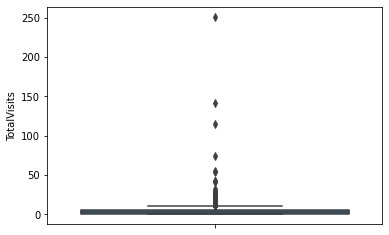

In [174]:
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [175]:
leads = leads[(leads.TotalVisits <= leads.TotalVisits.quantile(.99))]

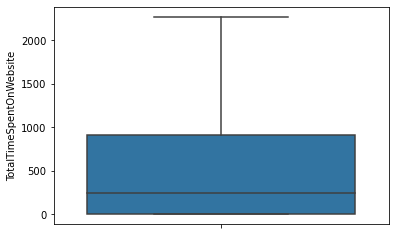

In [176]:
sns.boxplot(y=leads['TotalTimeSpentOnWebsite'])
plt.show()

In [177]:
leads[(leads.TotalTimeSpentOnWebsite <= 1500)].shape

(8456, 13)

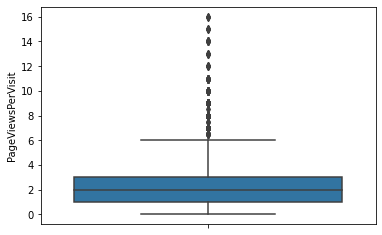

In [178]:
sns.boxplot(y=leads.PageViewsPerVisit)
plt.show()

In [179]:
leads.PageViewsPerVisit.describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: PageViewsPerVisit, dtype: float64

In [180]:
leads = leads[(leads.PageViewsPerVisit <= 10)]

In [181]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8976 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LeadOrigin                    8976 non-null   object 
 1   LeadSource                    8976 non-null   object 
 2   Converted                     8976 non-null   int64  
 3   TotalVisits                   8976 non-null   float64
 4   TotalTimeSpentOnWebsite       8976 non-null   int64  
 5   PageViewsPerVisit             8976 non-null   float64
 6   LastActivity                  8976 non-null   object 
 7   Country                       8976 non-null   object 
 8   Specialization                8976 non-null   object 
 9   CurrentOccupation             8976 non-null   object 
 10  City                          8976 non-null   object 
 11  FreeCopyOfMasteringInterview  8976 non-null   int64  
 12  LastNotableActivity           8976 non-null   object 
dtypes: 

### Deal with Categorical Variables

In [182]:
leads.head()

,LeadOrigin,LeadSource,Converted,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,CurrentOccupation,City,FreeCopyOfMasteringInterview,LastNotableActivity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Mumbai,0,Modified


In [183]:
leads.LeadSource.value_counts()

Google              2875
Direct Traffic      2505
Olark Chat          1751
Organic Search      1103
Reference            442
Welingak Website     129
Referral Sites       118
Social Media          33
Others                20
Name: LeadSource, dtype: int64

In [184]:
# city & country are correrlated, let's drop city
leads.drop(['City'], 1, inplace=True)
leads.head()

,LeadOrigin,LeadSource,Converted,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,CurrentOccupation,FreeCopyOfMasteringInterview,LastNotableActivity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,0,Modified


In [185]:
# Generate dummy variables
dummy = pd.get_dummies(leads[['LeadOrigin','CurrentOccupation']], drop_first=True)
leads = pd.concat([leads,dummy],1)
leads.head()

,LeadOrigin,LeadSource,Converted,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,CurrentOccupation,FreeCopyOfMasteringInterview,LastNotableActivity,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,0,Modified,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,1,Email Opened,1,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,Modified,1,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,0,Modified,1,0,0,0,0,0,1,0


In [191]:
dummy = pd.get_dummies(leads['Specialization'], prefix='Specialization')
dummy = dummy.drop(['Specialization_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)
leads.head()


,LeadOrigin,LeadSource,Converted,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,CurrentOccupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [192]:
dummy = pd.get_dummies(leads.LeadSource, prefix='LeadSource')
dummy = dummy.drop(['LeadSource_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)
leads.head()

,LeadOrigin,LeadSource,Converted,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,CurrentOccupation,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [195]:
dummy = pd.get_dummies(leads.LastActivity, prefix='LastActivity')
dummy = dummy.drop(['LastActivity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)
leads.head()

,LeadOrigin,LeadSource,Converted,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,CurrentOccupation,...,LeadSource_Social Media,LeadSource_Welingak Website,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,...,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [219]:
dummy = pd.get_dummies(leads.Country, prefix='Country')
dummy = dummy.drop(['Country_Indonesia'], 1)
leads = pd.concat([leads, dummy], axis = 1)
leads.head()

,Converted,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,Country,FreeCopyOfMasteringInterview,LastNotableActivity,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,...,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,0,0.0,0,0.0,India,0,Modified,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,India,0,Email Opened,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,India,1,Email Opened,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,India,0,Modified,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,India,0,Modified,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
dummy = pd.get_dummies(leads.LastNotableActivity, prefix='LastNotableActivity')
dummy = dummy.drop(['LastNotableActivity_Email Received'], 1)
leads = pd.concat([leads, dummy], axis = 1)
leads.head()

,Converted,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,Country,FreeCopyOfMasteringInterview,LastNotableActivity,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0.0,0,0.0,India,0,Modified,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,India,0,Email Opened,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,India,1,Email Opened,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,India,0,Modified,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,India,0,Modified,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [220]:
leads.LastNotableActivity.value_counts()

Modified                        3232
Email Opened                    2795
SMS Sent                        2150
Page Visited on Website          289
Olark Chat Conversation          182
Email Link Clicked               171
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: LastNotableActivity, dtype: int64

In [196]:
# drop original categorical columns
cate_columns = ['LeadOrigin','CurrentOccupation', 'Specialization', 'LeadSource', 'LastActivity', 'Country', 'LastNotableActivity']
leads.drop(cate_columns, 1, inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8976 entries, 0 to 9239
Data columns (total 99 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         8976 non-null   int64  
 1   TotalVisits                                       8976 non-null   float64
 2   TotalTimeSpentOnWebsite                           8976 non-null   int64  
 3   PageViewsPerVisit                                 8976 non-null   float64
 4   FreeCopyOfMasteringInterview                      8976 non-null   int64  
 5   LeadOrigin_Landing Page Submission                8976 non-null   uint8  
 6   LeadOrigin_Lead Add Form                          8976 non-null   uint8  
 7   LeadOrigin_Lead Import                            8976 non-null   uint8  
 8   CurrentOccupation_Housewife                       8976 non-null   uint8  
 9   CurrentOccupation_O

### Looking at Correlations

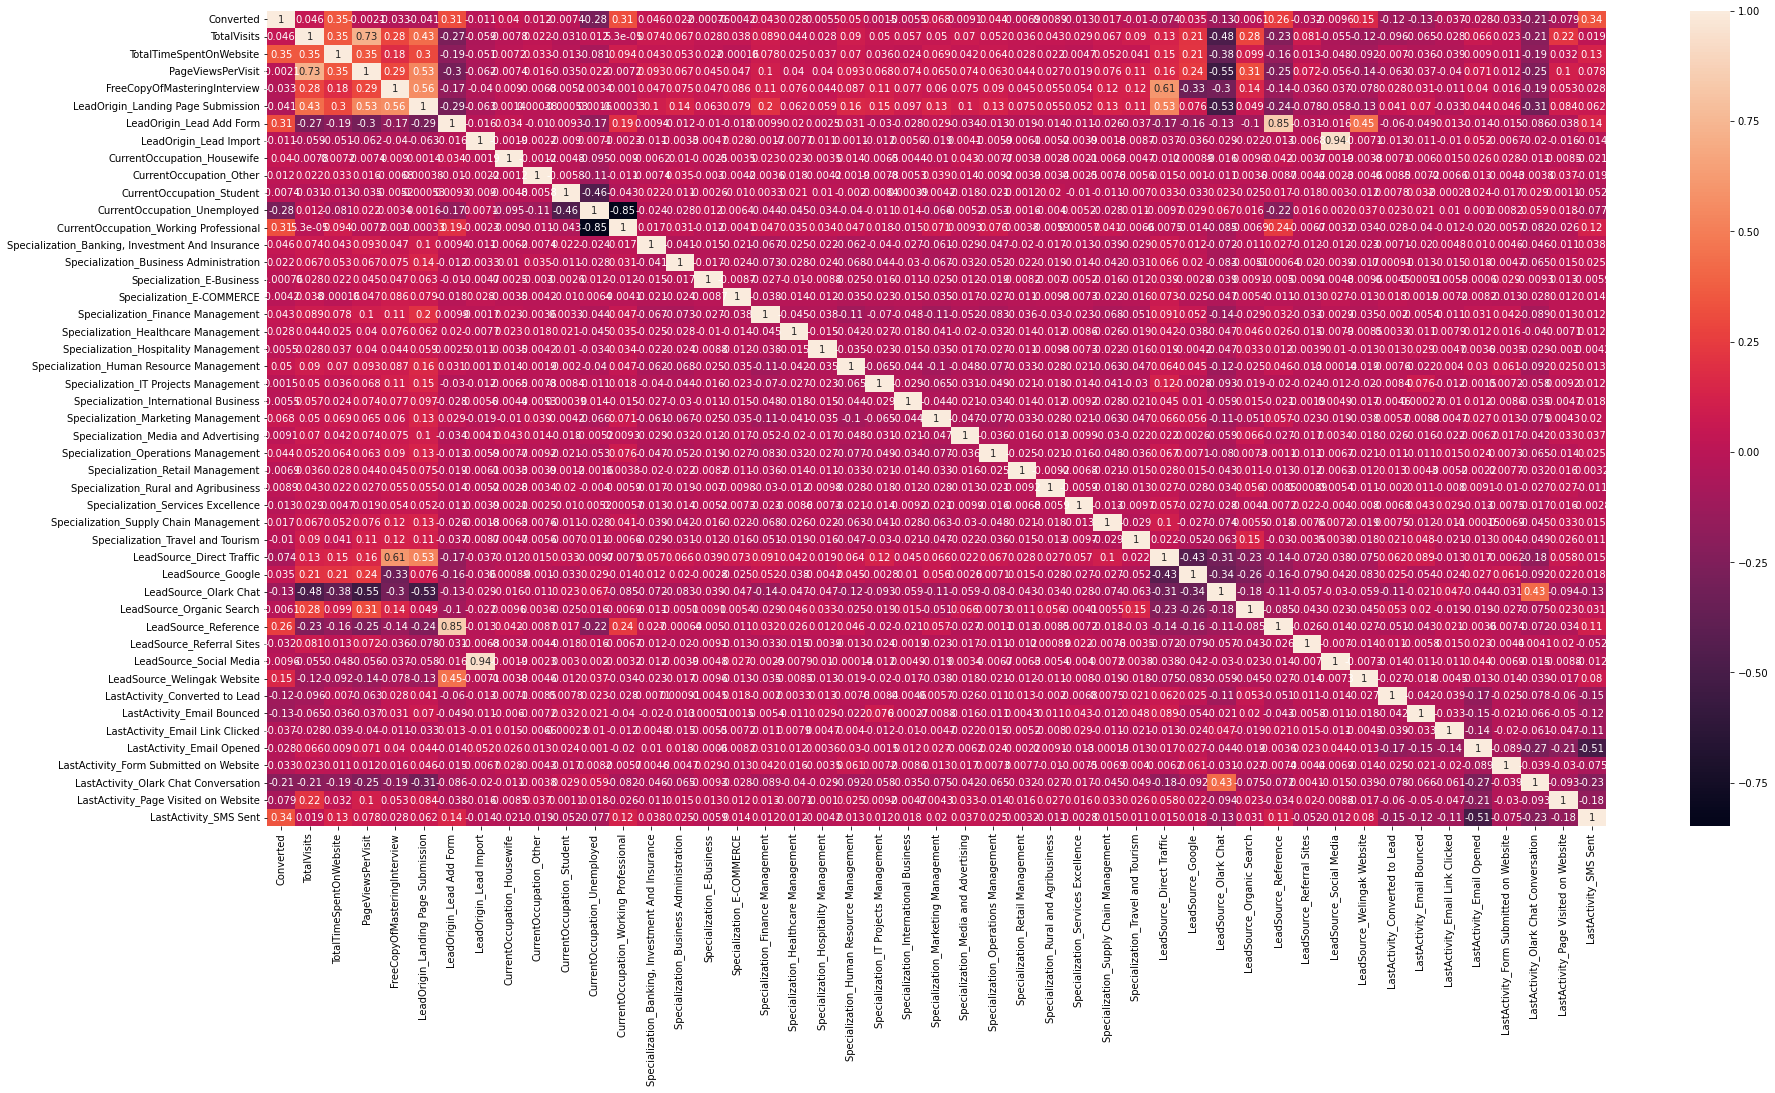

In [207]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

## Build Model

### Train-Test Split & Logistic Regression Model Building

In [223]:
# Putting response variable to y
y = leads['Converted']
y.head()
X=leads.drop('Converted', axis=1)

### Splitting the data into train and test

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [225]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6283 entries, 5555 to 5812
Data columns (total 98 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   TotalVisits                                       6283 non-null   float64
 1   TotalTimeSpentOnWebsite                           6283 non-null   int64  
 2   PageViewsPerVisit                                 6283 non-null   float64
 3   FreeCopyOfMasteringInterview                      6283 non-null   int64  
 4   LeadOrigin_Landing Page Submission                6283 non-null   uint8  
 5   LeadOrigin_Lead Add Form                          6283 non-null   uint8  
 6   LeadOrigin_Lead Import                            6283 non-null   uint8  
 7   CurrentOccupation_Housewife                       6283 non-null   uint8  
 8   CurrentOccupation_Other                           6283 non-null   uint8  
 9   CurrentOccupatio

### Scale Features

In [226]:
#scaling numeric columns
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,FreeCopyOfMasteringInterview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
5555,-0.74529,-0.167824,-0.671585,-0.66636,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
568,-0.04857,1.604517,-0.414920,1.50069,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3810,-0.39693,1.788944,-0.158254,-0.66636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
903,0.29979,-0.863113,0.868407,-0.66636,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1831,4.48011,1.921731,0.185677,1.50069,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Model Building using Stats Model & RFE

In [228]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False])

In [229]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 53),
 ('TotalTimeSpentOnWebsite', True, 1),
 ('PageViewsPerVisit', False, 54),
 ('FreeCopyOfMasteringInterview', False, 73),
 ('LeadOrigin_Landing Page Submission', False, 12),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 72),
 ('CurrentOccupation_Housewife', True, 1),
 ('CurrentOccupation_Other', False, 10),
 ('CurrentOccupation_Student', False, 9),
 ('CurrentOccupation_Unemployed', False, 8),
 ('CurrentOccupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 15),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 19),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 21),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 74),
 ('Specialization_Human Resource Management', False, 23),
 ('Specialization_IT Projects Management', False, 17),
 ('Specializa

In [239]:
#list of RFE supported columns
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['TotalTimeSpentOnWebsite', 'LeadOrigin_Lead Add Form',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Working Professional',
       'LeadSource_Olark Chat', 'LeadSource_Social Media',
       'LeadSource_Welingak Website', 'LastActivity_Email Bounced',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'Country_Italy', 'Country_Nigeria',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

In [232]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'PageViewsPerVisit', 'FreeCopyOfMasteringInterview',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Import',
       'CurrentOccupation_Other', 'CurrentOccupation_Student',
       'CurrentOccupation_Unemployed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_S

In [240]:
X_train_sm = sm.add_constant(X_train[rfe_columns])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6283
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.2
Date:                Wed, 01 Nov 2023   Deviance:                       5318.4
Time:                        00:19:41   Pearson chi2:                 6.64e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2021      0.056    -21.302      0.000      -1.313      -1.091
TotalTimeSpentOnWebsite                          1.0985      0.040     27.776      0.000       1.021       1.176
LeadOrigin_Lead Add Form                         4.0696      0.232     17.532      0.000       3.615       4.525
CurrentOccupation_Housewife                     24.0180   2.53e+04      0.001      0.999   -4.96e+04    4.96e+04
CurrentOccupation_Working Professional           2.8015      0.199     14.050      0.000       2.411       3.192
LeadSource_Olark Chat                            1.1442      0.104     11.030      0.000       0.941       1.347
LeadSource_Social Media                          1.2430      0.480      2.589      0.010       0.302       2.184
LeadSource_Welingak Website                      1.5746      0.755      2.087      0.037       0.096       3.053
LastActivity_Email Bounced                      -1.6301      0.340     -4.789      0.000      -2.297      -0.963
LastActivity_Olark Chat Conversation            -1.1767      0.177     -6.646      0.000      -1.524      -0.830
LastActivity_SMS Sent                            1.1618      0.073     15.868      0.000       1.018       1.305
Country_Italy                                  -24.8247   4.48e+04     -0.001      1.000   -8.78e+04    8.77e+04
Country_Nigeria                                -23.0950   3.92e+04     -0.001      1.000   -7.68e+04    7.67e+04
LastNotableActivity_Had a Phone Conversation    23.7086   3.08e+04      0.001      0.999   -6.03e+04    6.03e+04
LastNotableActivity_Modified                    -0.8694      0.080    -10.850      0.000      -1.026      -0.712
LastNotableActivity_Unreachable                  2.2306      0.599      3.727      0.000       1.058       3.404
================================================================================================================
"""

#### p-value of CurrentOccupation_Housewife, LastNotableActivity_Had a Phone Conversation is very high => Let's drop them

In [241]:
rfe_columns = rfe_columns.drop(['CurrentOccupation_Housewife', 'LastNotableActivity_Had a Phone Conversation'], 1)

In [242]:
X_train_sm = sm.add_constant(X_train[rfe_columns])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6283
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2667.5
Date:                Wed, 01 Nov 2023   Deviance:                       5335.0
Time:                        00:19:53   Pearson chi2:                 6.66e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.1914      0.056    -21.184      0.000      -1.302      -1.081
TotalTimeSpentOnWebsite                    1.0966      0.039     27.783      0.000       1.019       1.174
LeadOrigin_Lead Add Form                   4.0846      0.232     17.624      0.000       3.630       4.539
CurrentOccupation_Working Professional     2.7999      0.199     14.056      0.000       2.409       3.190
LeadSource_Olark Chat                      1.1359      0.104     10.966      0.000       0.933       1.339
LeadSource_Social Media                    1.2333      0.480      2.570      0.010       0.293       2.174
LeadSource_Welingak Website                1.5515      0.754      2.056      0.040       0.073       3.030
LastActivity_Email Bounced                -1.6378      0.340     -4.813      0.000      -2.305      -0.971
LastActivity_Olark Chat Conversation      -1.1817      0.177     -6.677      0.000      -1.529      -0.835
LastActivity_SMS Sent                      1.1525      0.073     15.763      0.000       1.009       1.296
Country_Italy                            -23.8213   2.71e+04     -0.001      0.999   -5.32e+04    5.32e+04
Country_Nigeria                          -22.0980   2.38e+04     -0.001      0.999   -4.66e+04    4.66e+04
LastNotableActivity_Modified              -0.8704      0.080    -10.882      0.000      -1.027      -0.714
LastNotableActivity_Unreachable            2.2206      0.598      3.711      0.000       1.048       3.394
==========================================================================================================
"""

#### p-value of Country_Italy, Country_Nigeria is very high => Let's drop them

In [243]:
rfe_columns = rfe_columns.drop(['Country_Italy', 'Country_Nigeria'], 1)

In [244]:
X_train_sm = sm.add_constant(X_train[rfe_columns])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6283
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2671.8
Date:                Wed, 01 Nov 2023   Deviance:                       5343.6
Time:                        00:20:44   Pearson chi2:                 6.66e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.1924      0.056    -21.217      0.000      -1.303      -1.082
TotalTimeSpentOnWebsite                    1.0943      0.039     27.769      0.000       1.017       1.172
LeadOrigin_Lead Add Form                   4.0838      0.232     17.626      0.000       3.630       4.538
CurrentOccupation_Working Professional     2.8012      0.199     14.070      0.000       2.411       3.191
LeadSource_Olark Chat                      1.1362      0.104     10.976      0.000       0.933       1.339
LeadSource_Social Media                    1.2326      0.480      2.568      0.010       0.292       2.173
LeadSource_Welingak Website                1.5525      0.754      2.058      0.040       0.074       3.031
LastActivity_Email Bounced                -1.6380      0.340     -4.815      0.000      -2.305      -0.971
LastActivity_Olark Chat Conversation      -1.1836      0.177     -6.690      0.000      -1.530      -0.837
LastActivity_SMS Sent                      1.1468      0.073     15.703      0.000       1.004       1.290
LastNotableActivity_Modified              -0.8670      0.080    -10.845      0.000      -1.024      -0.710
LastNotableActivity_Unreachable            2.2211      0.598      3.712      0.000       1.048       3.394
==========================================================================================================
"""

#### All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [245]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LeadSource_Olark Chat,1.60
7,LastActivity_Olark Chat Conversation,1.58
1,LeadOrigin_Lead Add Form,1.53
9,LastNotableActivity_Modified,1.45
5,LeadSource_Welingak Website,1.32
0,TotalTimeSpentOnWebsite,1.28
8,LastActivity_SMS Sent,1.24
2,CurrentOccupation_Working Professional,1.15
6,LastActivity_Email Bounced,1.09
4,LeadSource_Social Media,1.01


#### VIF Looks good

### Getting Predictions

In [246]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5555    0.095955
568     0.637238
3810    0.682484
903     0.047253
1831    0.510886
4530    0.112623
8673    0.386554
3319    0.394920
8171    0.245133
7650    0.294198
dtype: float64

In [247]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09595461, 0.6372383 , 0.68248419, 0.04725252, 0.51088592,
       0.11262307, 0.3865545 , 0.39492023, 0.24513301, 0.29419792])

In [248]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.095955,5555
1,1,0.637238,568
2,1,0.682484,3810
3,0,0.047253,903
4,1,0.510886,1831


In [249]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.095955,5555,0
1,1,0.637238,568,1
2,1,0.682484,3810,1
3,0,0.047253,903,0
4,1,0.510886,1831,1


### Checking Confusion matrix 

In [251]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print('Confusion', confusion)

# overall accuracy
print('Overall Accuracy: ', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Sensitivity', TP / float(TP+FN))
print('Specificity', TN / float(TN+FP))

Confusion [[3440  448]
 [ 751 1644]]
Overall Accuracy:  0.8091675950978832
Sensitivity 0.6864300626304801
Specificity 0.8847736625514403


### ROC CURVE

In [252]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [253]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

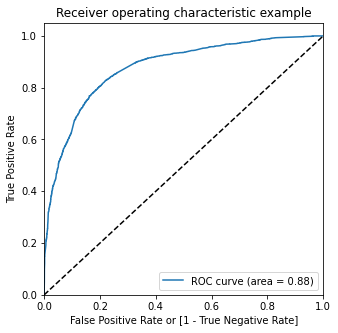

In [254]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### ROC Curve is close to the left hand and near on the top => It's good

## Making Predictions

In [256]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,FreeCopyOfMasteringInterview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
4190,-0.728622,-0.313269,-0.652297,1.435349,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5186,0.590047,1.065190,0.139170,1.435349,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7032,-0.398955,1.553204,-0.124652,1.435349,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5977,-1.058290,-0.865017,-1.179942,-0.696695,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7795,-0.398955,-0.839523,-0.652297,-0.696695,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [257]:
X_test = X_test[rfe_columns]
X_test.head()

,TotalTimeSpentOnWebsite,LeadOrigin_Lead Add Form,CurrentOccupation_Working Professional,LeadSource_Olark Chat,LeadSource_Social Media,LeadSource_Welingak Website,LastActivity_Email Bounced,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,LastNotableActivity_Modified,LastNotableActivity_Unreachable
4190,-0.313269,0,0,0,0,0,0,0,0,1,0
5186,1.065190,0,0,0,0,0,0,0,0,0,0
7032,1.553204,0,0,0,0,0,0,0,1,1,0
5977,-0.865017,0,0,1,0,0,0,1,0,1,0
7795,-0.839523,0,0,0,0,0,0,0,1,1,0


In [258]:
X_test_sm = sm.add_constant(X_test)

In [259]:
y_test_pred = res.predict(X_test_sm)

In [260]:
y_test_pred[:10]

4190    0.083008
5186    0.493306
7032    0.687195
5977    0.045075
7795    0.138087
6457    0.866202
7214    0.991389
5107    0.268402
2635    0.051745
6785    0.770134
dtype: float64

In [261]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [262]:
# Let's see the head
y_pred_1.head()

,0
4190,0.083008
5186,0.493306
7032,0.687195
5977,0.045075
7795,0.138087


In [264]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4190,0.083008
1,1,5186,0.493306
2,0,7032,0.687195
3,0,5977,0.045075
4,1,7795,0.138087
